In [1]:
%gui qt5

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import starfish.data
import numpy as np

This notebook demonstrates how to load SeqFISH data into starfish. Below loads a fraction of fov_000, a single field of view from the Intron-SeqFISH paper. We load the test data as the full dataset is ~ 5GB and may be difficult for some laptops to load. 

In [4]:
experiment = starfish.data.SeqFISH(use_test_data=True)

In [5]:
fov = experiment['fov_000']
stack = fov['primary']

100%|██████████| 1740/1740 [00:02<00:00, 805.97it/s]


SeqFISH wants to find approximately identical numbers of spots in each round. Try a few filters to remove background. 

In [6]:
from starfish.image import Filter

In [7]:
glp = Filter.GaussianLowPass(sigma=1)
mhp = Filter.MeanHighPass(size=3)

In [8]:
filtered = glp.run(stack, in_place=False)
filtered = mhp.run(filtered, in_place=False)

(array([1.36254061e+08, 1.30014000e+05, 2.28870000e+04, 5.90000000e+03,
        1.79400000e+03, 6.73000000e+02, 2.76000000e+02, 1.60000000e+02,
        8.70000000e+01, 4.90000000e+01, 3.10000000e+01, 2.80000000e+01,
        1.00000000e+01, 9.00000000e+00, 5.00000000e+00, 7.00000000e+00,
        3.00000000e+00, 2.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00]),
 array([0.        , 0.00092621, 0.00185242, 0.00277863, 0.00370484,
        0.00463104, 0.00555725, 0.00648346, 0.00740967, 0.00833588,
        0.00926209, 0.0101883 , 0.01111451, 0.01204071, 0.01296692,
        0.01389313, 0.01481934, 0.01574555, 0.01667176, 0.01759797,
        0.01852418, 0.01945039, 0.02037659, 0.0213028 , 0.02222901,
        0.02315522], dtype=float32),
 <a list of 25 Patch objects>)

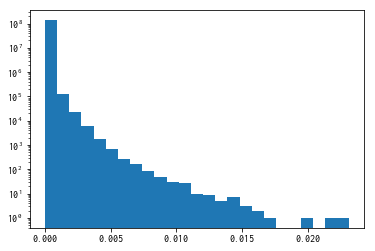

In [14]:
plt.hist(np.ravel(filtered.xarray.values), bins=25, log=True)

In [18]:
from starfish.spots import SpotFinder

In [ ]:
psd = SpotFinder.PixelSpotDetector(experiment.codebook, metric='euclidean', distance_threshold=0.5, magnitude_threshold=0.020, min_area=0, max_area=10)
psd.run(filtered)

100%|██████████| 1740/1740 [00:00<00:00, 18384.30it/s]
